<center>
    <h1 style="font-size: 12; font-weight: 900; ">--- 5 ---<h1>
    <h2>CSiAPI - ETABS y SAP2000</h2>
    <!-- <p><strong></strong</p> -->
</center>

## Marco Parametrico (Frame 2D)

In [244]:
import os, sys

In [245]:
import numpy as np

In [246]:
import comtypes.client

### 1. Uso de sistema de Unidades

In [247]:
# Unidades Base mks
m = 1
kg = 1
s = 1

# Otras Unidades
cm = 0.01*m
kgf = 9.80665*kg*m/s**2
tonf = 1000*kgf

# Constantes Físicas
g = 9.80665*m/s**2

# configuraciones de unidades
units = {
    'kN_m_C': 6,
    'kgf_m_C': 8,
    'Tonf_m_C': 12,
}

### 2. Ejemplos o Modelos

#### Ejemplo-01a (2D)

Analizar completamente la estructura mostrada. Considerar que el marco es de concreto armado donde E = 217370.65 kg/cm2 y las propiedades geométricas de los elementos estructurales son para vigas: 25 × 50 cm2 y para columnas: 25 × 25 cm2. La zapata en el apoyo izquierdo
es de 80 × 80 cm2 y en el apoyo derecho es de 100 × 100 cm2.

<center>

![e-02](./images/e2.png)

</center>

Nota: El presente ejercicio es resuelto en el PROBLEMA 10-10 con simulación de apoyo elástico. ref (Alder Jhosue Quispe Panca)

In [248]:
fc = 210 * (kg/cm**2)   # Concrete strength [kg/cm2]
# E = 151 * fc **0.5 *(kgf/cm**2)
E = 217370.65 *(kg/cm**2);
v = 0.2;
G = 0.5 *E / (1+v); # Shear modulus [kgf/cm**2]
coeficienteTermico = 0;

material_name = f'fc={str(fc)} kg/cm^2'; # fc=280 kg/cm^2
material_type = 2;

# --- secciones para la viga y columna
#     [Define > Section Properties > Frame Sections... > Add New Property... > ... ]
secBeamb = 25*cm; # cm
secBeamh = 50*cm; # cm
beamName = f'V{str(secBeamb)}x{str(secBeamh)}'
secColumnb = 25*cm; # cm
secColumnh = 25*cm; # cm
columnName = f'C{str(secColumnb)}x{str(secColumnh)}'

coords = np.array([
    [0.0, 0.0, 0.0],
    [5.0, 0.0, 0.0],
    [0.0, 0.0, 4.0],
    [5.0, 0.0, 4.0],
    [0.0, 0.0, 7.0],
    [5.0, 0.0, 7.0],
]);
elems = np.array([
    [0, 2, 1], # columna=1
    [1, 3, 1], # columna
    [2, 3, 2], # viga=2
    [2, 4, 1], # columna
    [3, 5, 1], # columna
    [4, 5, 2], # viga
]);

apoyos = np.array([
    [0, True, True, True, True, True, True],
    [1, True, True, True, True, True, True],
]);

use_unit_point = units['kgf_m_C'] # kN_m_C
# cargas puntuales --- [Assign > Joint Loads > Forces]
NameLoadP, LTYPE = "CPuntual", 8 # LTYPE_OTHER=8
#   cargasEnNodo[idNodo, Fx,Fy,Fz, Rx,Ry,Rz]
cargasEnNodo = np.array([
    [2, 700, 0.0, 0.0, 0.0, 0.0, 0.0],
    [5, 1_000, 0.0, 0.0, 0.0, 0.0, 0.0],
])

use_unit_distr = units['kgf_m_C'] #
DeadName, LiveName = "CargaMuerta", "CargaViva"
# cargas distribuidas --- [Define > Frame Loads > Distributed...]
#   cargasDistr{idElem, [tipoCarga, force (F/L) or moment (M/L), [1:g=X,2:r=Y,3:b=Z], iLoad,jLoad]
cargasDistr = {
    "3": [(), (LiveName, 1, 2, 0,1, -1200.0, -1200.0)],
    "6": [(), (LiveName, 1, 2, 0,1, -1200.0, -1200.0)],
 } # [kg/m]

nameModelProject = 'Marco de 2 Niveles Regular (2D)'
connect_to = 1 # Coneccion: 1 para sap2000 y 2 para etabs

# Variable para definir una instancia manual para el programa y definir la ruta.
rutaEspecifica = False
if rutaEspecifica:
    ruta_app = "C:\\Program Files\\Computers and Structures\\SAP2000 23\\SAP2000.exe" if connect_to else "C:\\Program Files\\Computers and Structures\\ETABS 21\\ETABS.exe"
else: 
    ruta_app = None

#### Ejemplo-02a (3D)

pag.298 Example 6.2

In [249]:
# ton_m_C = 12
# SapModel.SetPresentUnits(ton_m_C) # Tonf, m, C|

# material_concrete = 2 # material_type = 2;
# SapModel.SetMaterial('CONC280', material_concrete)

# E= 15000*(280**0.5)*10000
# SapModel.SetMaterialProperty('CONC280', 
#                              E, 
#                              0.2, 
#                              9.9e6)

# H = 3.50
# Lx = 4.50
# Ly = 4.50
# coords = np.array([
#     '1': (0.0, 0.0, 0.0),
#     '2': (Lx, 0.0, 0.0),
#     '3': (Lx, Ly, 0.0),
#     '4': (0.0, Ly, 0.0),
#     '5': (0.0, 0.0, 1.2*H),
#     '6': (Lx, 0.0, 5*H),
#     '7': (Lx, Ly, 1.2*H),
#     '8': (0.0, Ly, 5*H),
# ])
# for label, (x,y,z) in coords.items():
#     SapModel.PointObj.AddCartesian(x, y, z, label)

# for nodei in ['1','2','3','4']:
#     SapModel.PointObj.SetRestraint(nodei, 
#         [True, True, True, 
#         True, True, True])  
    
# SapModel.FrameObj.AddByCoord(0,0,0,0,0,H, '', 'COL45x45')
# SapModel.FrameObj.AddByCoord(Lx,0,0,Lx,0,H, '', 'COL45x45')
# SapModel.FrameObj.AddByCoord(Lx,Ly,0,Lx,Ly,H, '', 'COL45x45')
# SapModel.FrameObj.AddByCoord(0,Ly,0,0,Ly,H, '', 'COL45x45')

# SapModel.FrameObj.AddByCoord(0,0,H, Lx,0,H, '', 'V1', 'VIG30x60')
# SapModel.FrameObj.AddByCoord(Lx,0,H, Lx,Ly,H, '', 'V2', 'VIG30x60')
# SapModel.FrameObj.AddByCoord(Lx,Ly,H, 0,Ly,H, '', 'V3', 'VIG30x60')
# SapModel.FrameObj.AddByCoord(0,Ly,H, 0,0,H, '', 'V4', 'VIG30x60')

# SapModel.LoadPatterns.Add('DEAD1', 1, True)
# SapModel.LoadPatterns.Add('LIVE1', 3, True)

# # carga distribuida
# q=1.2 # ton/m
# SapModel.FrameObj.SetLoadDistributed('5', 'DEAD1', 1, 10, 0, 1, q, q, 'Global')
# SapModel.FrameObj.SetLoadDistributed('5', 'DEAD1', 1, 10, 0, 1, q, q, 'Global')
# SapModel.FrameObj.SetLoadDistributed('6', 'DEAD1', 1, 10, 0, 1, q, q, 'Global')
# SapModel.FrameObj.SetLoadDistributed('7', 'DEAD1', 1, 10, 0, 1, q, q, 'Global')
# SapModel.FrameObj.SetLoadDistributed('8', 'DEAD1', 1, 10, 0, 1, q, q, 'Global')

# SapModel.PointObj.SetLoadForce('5', 'LIVE1', [2.0, 0.0, 0.0, 0.0, 0.0, 0.0])
# SapModel.PointObj.SetLoadForce('6', 'LIVE1', [2.0, 0.0, 0.0, 0.0, 0.0, 0.0])

# SapModel.RespCombo.Add('COMBO1', 0)
# SapModel.RespCombo.SetCaseList('COMBO1', 0, 'DEAD1', 1.0)
# SapModel.RespCombo.SetCaseList('COMBO1', 0, 'LIVE1', 1.0)




### 3. Coneccion al API CSI (SAP2000 or ETABS)

#### PlotModel

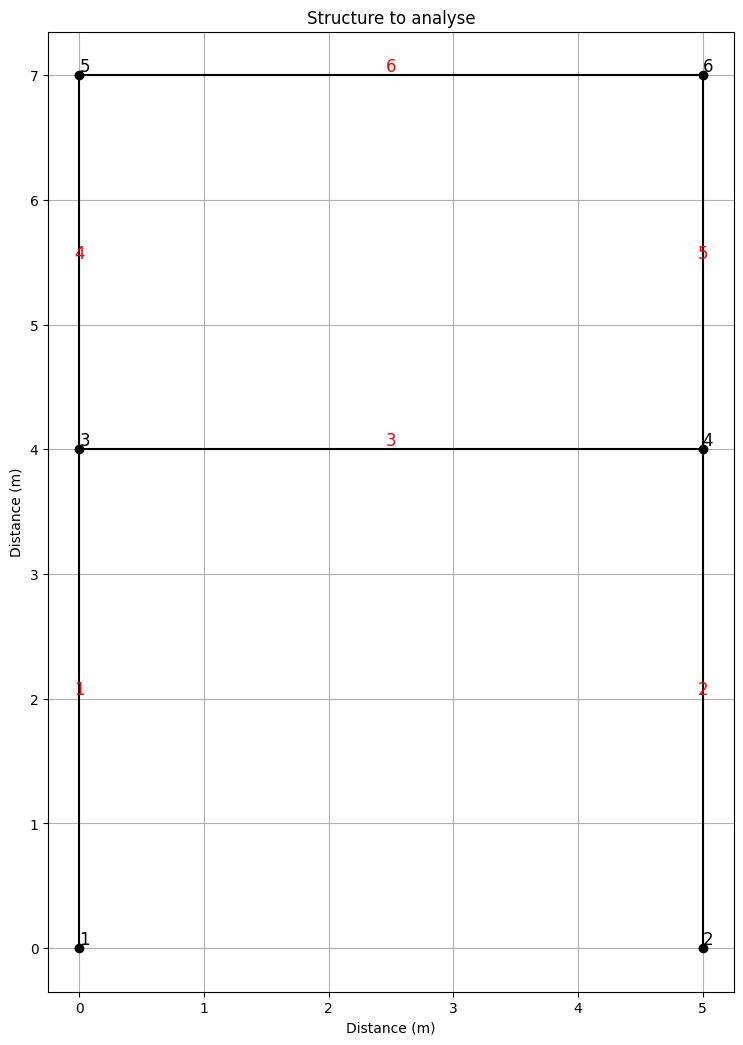

In [250]:
from utilities.plotModel import plotModel2d, plotModel3d

plotModel2d(coords, elems, nameModelProject)

#### Conexion al API

In [251]:
from utilities.connectcsi import ConnectCSiAPI

In [252]:
smodel, response = None, None

connection = ConnectCSiAPI(connect_to)
response, connect_to_app = connection.attach_to_instance()
if not(response):
    response, connect_to_app = connection.connect_default()

Software: SAP2000
No se encontró ninguna instancia en ejecución del programa(SAP2000).
Coneccion establecida para SAP2000!.


In [253]:
connect_to_app.ApplicationStart()

smodel = connect_to_app.SapModel

### 4. Se crea un nuevo Lienzo y Modelo

In [254]:
# ------------------- creacion de nuevo modelo ------------------

# Se crea un nuevo lienzo
# smodel.InitializeNewModel;
smodel.InitializeNewModel(units['Tonf_m_C']); # esto es equivalente a la anterios 
response = smodel.SetModelIsLocked(False)

print(f"{units.items()}\n{smodel.GetPresentUnits()}")

if connect_to == 2: 
    response = smodel.File.NewGridOnly(3, 3*m,3*m, 5*m,4*m, 4*m,4*m)
else: response = smodel.File.NewBlank()

print(f"{'Success' if not(response) else 'Error'}")

dict_items([('kN_m_C', 6), ('kgf_m_C', 8), ('Tonf_m_C', 12)])
12
Success


In [255]:
smodel.View.RefreshView(0, False);

### 5. Definimos o establecemos las propiedades del material (Concrete or Steel)

In [256]:
# definicion del material
response_status = smodel.PropMaterial.SetMaterial( material_name, material_type )
print(f"TIPO DE MATERIAL: {'success' if not(response_status) else 'Error'}")

# propiedades mecanicas del material
response_status = smodel.PropMaterial.SetMPIsotropic( material_name, E, v, coeficienteTermico )
print(f"Propiedades mecanicas del material: {'success' if not(response_status) else 'Error'}")

TIPO DE MATERIAL: success
Propiedades mecanicas del material: success


In [257]:
# Secciones de viga y columna
response_status_v = smodel.PropFrame.SetRectangle(beamName, material_name, secBeamb, secBeamh) # seccion para la viga
response_status_c = smodel.PropFrame.SetRectangle(columnName, material_name, secColumnb, secColumnh) # seccion para la columna

print(f"Secciones viga: {'success' if not(response_status_v) else 'Error'}\nSecciones columna: {'success' if not(response_status_c) else 'Error'}")

Secciones viga: success
Secciones columna: success


In [258]:
smodel.View.RefreshView(0, False);

### 6. Geometria de la estructura

In [259]:
# Delete each frame object
_, all_frames, _ = smodel.FrameObj.GetNameList()
estado = []
for frame in all_frames:
    response = smodel.FrameObj.Delete(frame)
    estado.append(response)
print(f"All frames deleted successfully. {estado}")

All frames deleted successfully. []


In [260]:
# 2da forma de ingreso por coordenadas (vertices y aristas)
FrameName1, mbrName = '', ''
for idx, mbr in enumerate(elems):
    deNodo = int(mbr[0])
    alNodo = int(mbr[1])
    xi, yi, zi = coords[deNodo, 0].item(), coords[deNodo, 1].item(), coords[deNodo, 2].item()
    xf, yf, zf = coords[alNodo, 0].item(), coords[alNodo, 1].item(), coords[alNodo, 2].item()

    identificador = int(mbr[2]) # columna o viga
    if identificador == 1: mbrName = columnName # columnas
    elif identificador == 2: mbrName = beamName # vigas
    else: pass

    [FrameName1, response_status] = smodel.FrameObj.AddByCoord(
        xi,yi,zi, xf,yf,zf, ""+str(idx+1), mbrName, str(idx+1), 'Global'
        # xi,yi,zi, xf,yf,zf, str(idx+1), mbrName, str(idx+1), 'Global'
    )

    print(fr"{"FrameName"+str(idx+1)}: {mbrName} [x{xi,xf}), (y{yi, yf}),(z{zi, zf})]: {'success' if not response_status else 'Error'}")

FrameName1: C0.25x0.25 [x(0.0, 0.0)), (y(0.0, 0.0)),(z(0.0, 4.0))]: success
FrameName2: C0.25x0.25 [x(5.0, 5.0)), (y(0.0, 0.0)),(z(0.0, 4.0))]: success
FrameName3: V0.25x0.5 [x(0.0, 5.0)), (y(0.0, 0.0)),(z(4.0, 4.0))]: success
FrameName4: C0.25x0.25 [x(0.0, 0.0)), (y(0.0, 0.0)),(z(4.0, 7.0))]: success
FrameName5: C0.25x0.25 [x(5.0, 5.0)), (y(0.0, 0.0)),(z(4.0, 7.0))]: success
FrameName6: V0.25x0.5 [x(0.0, 5.0)), (y(0.0, 0.0)),(z(7.0, 7.0))]: success


In [261]:
smodel.View.RefreshView(0, False);

In [262]:
# restr = [True, True, True, True, True, True];
# smodel.Pointobj.SetRestraint(point1, restr);
# smodel.Pointobj.SetRestraint(point2, restr);

# lpName = "Test";
# # 1 = Force per unit length
# # 2 = Moment per unit length
# # smodel.FrameObj.SetLoadDistributed(FrameName, "DEAD", 1, 10, 0.0, 1.0, 15.0, 5.0);
# smodel.FrameObj.SetLoadDistributed(frameName, lpName, 1, 10, 0.0, 1.0, 15.0, 5.0);


### 7. Restricciones o condiciones de borde (apoyos)

In [263]:
# nrestrict = apoyos.shape[0]

node_i, node_j = ' ', ' '
for node, restricts in enumerate(apoyos):

    [node_i, node_j, response_status1] = smodel.FrameObj.GetPoints(
        str(int(restricts[0])+1), 
        node_i, 
        node_j
    )
    response_status = smodel.Pointobj.SetRestraint(
        node_i, 
        [*apoyos[node,1::].tolist()]
    );
    
    print(response_status1, response_status, ["FrameName"+str(restricts[0]+1), apoyos[node,1::].tolist()])

0 [(True, True, True, True, True, True), 0] ['FrameName1', [1, 1, 1, 1, 1, 1]]
0 [(True, True, True, True, True, True), 0] ['FrameName2', [1, 1, 1, 1, 1, 1]]


In [264]:
smodel.View.RefreshView(0, False);

### 8. Se establece las cargas

#### Carga Puntual en Horizontal o Vertical y Momento

establecemos las unidades de las cargas

In [265]:
smodel.SetPresentUnits(use_unit_point) # configuracion de unidades para la carga
print(f"{units.items()}\n{smodel.GetPresentUnits()}")

dict_items([('kN_m_C', 6), ('kgf_m_C', 8), ('Tonf_m_C', 12)])
8


patron de carga

In [266]:
# eLoadPatternType
smodel.LoadPatterns.Add(NameLoadP, LTYPE, True) # patron para la cargas puntuales (LTYPE_OTHER = 8)

0

Asignamos la carga

In [267]:
#  --- cargas en nodos ---

# altura_entrepiso = [2.5, 2.5, 3]
# altura_acumulada = [sum(altura_entrepiso[:i]) for i in range(len(altura_entrepiso)+1)]
# Colimna_i = [[(0,0,i), f'col_i_{i}'] for i in altura_acumulada]
# for a,b in zip(Colimna_i, [0,5,10,12]):
#     print(a[1])

# response_status = smodel.FrameObj.SetLoadPoint('carga_puntual_horizontal_or_vertical', 'LIVE', 1, 40, 0.5, 1)
for _, carga_en_nudo in enumerate(cargasEnNodo):
    PointName1 = int(carga_en_nudo[0])
    node_load = carga_en_nudo[1:].tolist()
    response = smodel.PointObj.SetLoadForce(
        str(PointName1), 
        NameLoadP, 
        node_load
    )
    
    print( f"{node_load} estado = {'ok' if not response[1] else 'Error'}" )

[700.0, 0.0, 0.0, 0.0, 0.0, 0.0] estado = ok
[1000.0, 0.0, 0.0, 0.0, 0.0, 0.0] estado = ok


#### Carga Distribuidas

In [268]:
smodel.LoadPatterns.Add("DEAD", 1, 0, True)       # Dead load
smodel.LoadPatterns.Add(DeadName, 1, 0, True) # patron para la carga muerta (LTYPE_DEAD = 1)
smodel.LoadPatterns.Add(LiveName, 3, 0, True) # patron para la carga distribuida viva (LTYPE_LIVE = 3)

0

In [269]:
smodel.SetPresentUnits(use_unit_distr)
print(f"{units.items()}\n{smodel.GetPresentUnits()}")

dict_items([('kN_m_C', 6), ('kgf_m_C', 8), ('Tonf_m_C', 12)])
8


In [270]:
# traemos los ids de los PATRONES de carga y nombre de los Elementos o aristas (viga, columna)
ret, nPat, patterns = smodel.LoadPatterns.GetNameList()
print("Patrones de carga en el modelo:", nPat)
ret, nFrames, frames = smodel.FrameObj.GetNameList()
print("Marcos en el modelo:", nFrames)

Patrones de carga en el modelo: ('DEAD', 'CPuntual', 'CargaMuerta', 'CargaViva')
Marcos en el modelo: ('1', '2', '3', '4', '5', '6')


`Sintax` para la carga distribuida

```py
SetLoadDistributed(
	Name: str,                  # Nombre del elemento o idElemento
	LoadPat: str,               # Nombre de patron de la carga o idCargaDistribuida
	MyType: int,                # 1: Fuerza por unidad de longitud (F/L), o 2: Momento por unidad de longitud (M/L)
	Dir: int,                   # las opciones son de 1 a 11, ... (Loacl axis: 1=X, 2=Y, 3=Z, ...) 
	Dist1: float,               # punto incial de la carga distribuida
	Dist2: float,               # punto final de la carga distribuida
	Val1: float,                # valor de carga en el nodo inicial
	Val2: float,                # valor de carga en el nodo final
	CSys = "Global",            # opcional, Sistema de referencia (Local o Global) ...
	RelDist = true, # bool
	Replace = true, # bool
	ItemType = eItemType.Objects # eItemType 
) -> int
```

In [271]:
# --- Cargas distribuidas ---

# --- cargas viva y muerta (distribuida) ---
#     cargasDistr[idElem, tipoCarga, [1:g,2:r,3:b], i,j, F/L, iLoad,jLoad]
FrameName4, FrameName5 = ' ', ' '
for idElem, bd_params in cargasDistr.items():
    node_i, node_j, _ = smodel.FrameObj.GetPoints(idElem)

    if (len(bd_params[0]) != 0 ) and DeadName in smodel.LoadPatterns.GetNameList()[1]: 
        name_pat, type_load, dir_load, i, j, iLoad, jLoad = bd_params[0] # carga muerta
        response_status = smodel.FrameObj.SetLoadDistributed( 
            idElem, name_pat, type_load, dir_load, i,j, iLoad, jLoad, "Local" )
    else:
        response_status = -1
    print(f"carga muerta: {bd_params[0]}, {'ok' if not(response_status) else 'Error'}")

    name_pat, type_load, dir_load, i,j, iLoad, jLoad = bd_params[1] # carga viva
    response_status = smodel.FrameObj.SetLoadDistributed( 
        idElem, name_pat, type_load, dir_load, i,j, 
        iLoad, jLoad, "Local", True)
    
    print(f"carga viva: {idElem},({node_i},{node_j}), {name_pat, type_load, dir_load, i,j, iLoad, jLoad}, estado={'ok' if not(response_status) else 'Error'}")
    del (name_pat, type_load, dir_load, node_i, node_j, iLoad, jLoad)

carga muerta: (), Error
carga viva: 3,(2,4), ('CargaViva', 1, 2, 0, 1, -1200.0, -1200.0), estado=ok
carga muerta: (), Error
carga viva: 6,(5,6), ('CargaViva', 1, 2, 0, 1, -1200.0, -1200.0), estado=ok


In [272]:
smodel.View.RefreshView(0, False)

0

In [242]:
# ret = smodel.FrameObj.GetLoadDistributed("3")
# print("Cargas distribuidas en marco 3:", ret)

### 8. Guardamos el modelo

In [ ]:
# full path to the model, set it to the desired path of your model
APIPath = 'C:\\CSi_API_Example'

msg = None
if not os.path.exists(APIPath):
    try: os.makedirs(APIPath)
    except OSError: pass

    ModelPath = APIPath + os.sep + 'Frame3D.edb'
    smodel.File.Save(ModelPath)
    ms = f"{ModelPath}"
else:
    print(f"{msg}, sucesss")

### 9. Ejecutar análisis

In [274]:
# ------------------ Analisis y ejecucion del modelo -----------------
# # una ves ejecutado una primera vez ya se peude 
# # comentar de la linia 26 a 56 y descomentar 60 a 63
# smodel.SetModelIsLocked(false);
# for i in range(3):
#     smodel.FrameObj.SetEndLengthOffset(str(i), flase, 0.0, 0.0, 0.0);

# 'run analysis
smodel.Analyze.RunAnalysis();

### 10. Mostramos los resultados y Cerramos la coneccion o la aplicacion

In [276]:
nele, nres, nnode = np.array(elems).shape[0], np.array(apoyos).shape[0], len(coords)
nele, nres, nnode

(6, 2, 6)

In [283]:
response = smodel.Results.Setup.DeselectAllCasesAndCombosForOutput()
# se le pasa el nombre del load pattern o caso de carga [NameLoadP, DeadName, LiveName]
response = smodel.Results.Setup.SetCaseSelectedForOutput(NameLoadP) 

res = smodel.Results.JointDispl("2",0) # desplazamiento
ux, uy = res[6], res[8] 
ux, uy

((8.962704398807363e-06,), (-3.1221945539304315e-08,))

In [284]:
# Close the program | Cerrar la aplicacio
if(connect_to_app.ApplicationExit(False)): print("No se pudo cerrar la coneccion!")
else: print("Se cerro con exito.")
    
onnect_to_app, smodel = None, None
del (connect_to_app, smodel)

Se cerro con exito.


## Referencia.

- [1] ...